# Load Dataset, basic info about the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('/content/Credit_score.csv')

In [ ]:
# Data overview
print(df.head())
print(df.info())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12                    NaN                  3  ...   
2      19114.12                    NaN                  3  ...   
3      19114.12                    NaN                  3  ...   
4      19114.12            1824.843333                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                   4.0           _      

In [ ]:
print(df.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count            9797.000000       11513.000000     11513.000000   
mean             4293.962454          17.505342        24.784331   
std              3187.283356         121.349593       139.373202   
min               355.208333           0.000000         0.000000   
25%              1677.030833           3.000000         4.000000   
50%              3247.849167           6.000000         5.000000   
75%              6088.586667           8.000000         7.000000   
max             14836.736670        1789.000000      1486.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   11513.000000         11513.000000          11275.000000   
mean       73.804569            21.187267             24.978625   
std       470.399485            14.637448            179.234223   
min         1.000000            -5.000000              0.000000   
25%         7.000000            10.000000           

# Data Cleaning, Identify and address any missing values, mismatch data types, inconsistencies

In [ ]:
# Data cleaning
print(df.isnull().sum())

ID                             0
Customer_ID                    0
Month                          0
Name                        1146
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1716
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1368
Delay_from_due_date            0
Num_of_Delayed_Payment       814
Changed_Credit_Limit           0
Num_Credit_Inquiries         238
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1074
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      501
Payment_Behaviour              0
Monthly_Balance              147
dtype: int64


In [ ]:
# Fill missing 'Name' values within each 'Customer_ID' group
def fill_missing_names(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

df['Name'] = df.groupby('Customer_ID')['Name'].transform(fill_missing_names)

# Clean Age Column

In [ ]:
# Step 1: Clean the Age column
df['Age'] = df['Age'].replace('_', '', regex=True).replace('-', '', regex=True).astype(str)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 2: Define a function to replace invalid values with the mode
def fill_inconsistent_with_mode(group):
    mode_age = group.mode()[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_age if pd.isna(x) or x < 0 or x>90 else x)

# Step 3: Apply the function to each group
df['Age'] = df.groupby('Customer_ID')['Age'].transform(fill_inconsistent_with_mode)


In [ ]:
# Step 1:Clean the SSN Column F%$D@*&8
df['SSN']=df['SSN'].replace('#F%$D@*&8',np.nan)

# Step 2: Define a function to replace null values with the mode
def fill_SSN(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)
# Step 3: Apply the function to each group
df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(fill_SSN)

In [ ]:
# Step 1:Clean the Occupation column with '--------'
df['Occupation']=df['Occupation'].replace('_______',np.nan)

# Step 2: Define a function to replace null values with the mode
def fill_Occupation(group):
    mode_data = group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.fillna(mode_data)

# Step 3: Apply the function to each group
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(fill_Occupation)

In [ ]:
#Annual_Income
# Step 1: Remove underscores from the 'Annual Salary' column
df['Annual_Income'] = df['Annual_Income'].replace('_', '', regex=True).astype(str)

# Step 2: Convert the column to numeric, forcing errors to NaN
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

# Step 3: Define a function to fill inconsistent values with the mode of the group
def fill_with_mode(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x>180000 else x)

# Step 4: Apply the function to each group
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(fill_with_mode)


In [ ]:
# Fill missing 'Monthly_Inhand_Salary' values within each 'Customer_ID' group

def fill_monthly_salary(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.fillna(mode_value)

df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(fill_monthly_salary)

In [ ]:
# Clean Num_Bank_Accounts column

def fill_Num_Bank_acct(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x>11 else x)

df['Num_Bank_Accounts'] =df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(fill_Num_Bank_acct)


In [ ]:
# Clean Num_Credit_Card column
def fill_Num_Credit_Card(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x>11 else x)

df['Num_Credit_Card']=df.groupby('Customer_ID')['Num_Credit_Card'].transform(fill_Num_Credit_Card)

In [ ]:
#Clean Interest_Rate Column

def Fill_Interest_Rate(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x>34 else x)


df['Interest_Rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(Fill_Interest_Rate)

Clean Num_of_Loan column

In [ ]:
#Clean Column Num_of_Loan
print(df['Num_of_Loan'].unique())

['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33']


In [ ]:
# Remove non-numeric characters and replace them with empty strings
df['Num_of_Loan'] = df['Num_of_Loan'].replace('_','', regex=True).astype(str)

# Convert to numeric, coercing errors to NaN
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

# Optionally, fill NaN values with a default value, e.g., 0
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(0).astype(int)

In [ ]:
def Fill_Num_of_Loan(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x< 0 or x>9 else x)

df['Num_of_Loan']=df.groupby('Customer_ID')['Num_of_Loan'].transform(Fill_Num_of_Loan)

Clean Type_of_Loan Column

In [ ]:
# Fill missing 'Type_of_Loan' values within each 'Customer_ID' group
def fill_Type_of_Loan(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

df['Type_of_Loan'] = df.groupby('Customer_ID')['Type_of_Loan'].transform(fill_missing_names)

In [ ]:
df['Type_of_Loan'].iloc[712:740]

,Type_of_Loan
712,Unknown
713,Unknown
714,Unknown
715,Unknown
716,Unknown
717,Unknown
718,Unknown
719,Unknown
720,Unknown
721,Unknown


In [ ]:
# Step 1: Remove unwanted characters (e.g., underscores)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace('_', '', regex=True)

# Step 2: Convert the column to numeric, coercing errors to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Step 3: Define the function to fill missing or invalid values
def fill_Num_of_Delayed_Payment(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x > 28 else x)

# Step 4: Apply the transformation
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(fill_Num_of_Delayed_Payment)

# Step 5: Handle any remaining NaN values (if there are any left after transformation)
# You can fill NaNs with 0, or another strategy (e.g., the mode of the entire column)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0)

# Step 6: Convert the column to integer
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11513 non-null  object 
 1   Customer_ID               11513 non-null  object 
 2   Month                     11513 non-null  object 
 3   Name                      11513 non-null  object 
 4   Age                       11513 non-null  int64  
 5   SSN                       11513 non-null  object 
 6   Occupation                11513 non-null  object 
 7   Annual_Income             11513 non-null  float64
 8   Monthly_Inhand_Salary     11513 non-null  float64
 9   Num_Bank_Accounts         11513 non-null  int64  
 10  Num_Credit_Card           11513 non-null  int64  
 11  Interest_Rate             11513 non-null  int64  
 12  Num_of_Loan               11513 non-null  int64  
 13  Type_of_Loan              11513 non-null  object 
 14  Delay_

In [ ]:
#Changed_Credit_Limit
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_','',regex=True).astype(str)
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')

def fill_changed_credit_limit(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.fillna(mode_value)

df['Changed_Credit_Limit']=df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(fill_changed_credit_limit)

In [ ]:
#Num_Credit_Inquiries
def fill_Num_Credit_Inquiries(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x> 17 else x)

df['Num_Credit_Inquiries']=df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(fill_Num_Credit_Inquiries)

In [ ]:
#Credit_Mix
df['Credit_Mix']=df['Credit_Mix'].replace('_','',regex=True)

# Define a function to fill empty strings with the mode value
def fill_credit_mix(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else ''
    return group.replace('', mode_value)

# Apply the function to each group
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(fill_credit_mix)


In [ ]:
df['Credit_Mix'].head(30)

,Credit_Mix
0,Good
1,Good
2,Good
3,Good
4,Good
5,Good
6,Good
7,Good
8,Good
9,Good


#Outstanding_Debt

In [ ]:
df['Outstanding_Debt']=df['Outstanding_Debt'].replace('_','',regex=True)
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'],errors='coerce')

def fill_Outstanding_Debt(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if x>5000 or pd.isna(x) else x)

df['Outstanding_Debt'] =df.groupby('Customer_ID')['Outstanding_Debt'].transform(fill_Outstanding_Debt)

In [ ]:
df['Outstanding_Debt'].iloc[360:375]

,Outstanding_Debt
360,3422.49
361,3422.49
362,3422.49
363,3422.49
364,3422.49
365,3422.49
366,3422.49
367,3422.49
368,2797.17
369,2797.17


In [ ]:
#!@9#%8 Payment_Behaviour

df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8','',regex=True).astype(str)

def fill_Payment_Behaviour(group):
    mode_value=group.mode().iloc[0] if not group.mode().empty else ''
    return group.replace('',mode_value)

df['Payment_Behaviour']=df.groupby('Customer_ID')['Payment_Behaviour'].transform(fill_Payment_Behaviour)

#Credit History Age

In [ ]:
import re

def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    # Use a regular expression to extract numbers before "Years" and "Months"
    match = re.match(r"(\d+)\s*Years?\s*and\s*(\d+)\s*Months?", age_str)
    if match:
        years, months = int(match.group(1)), int(match.group(2))
        return years * 12 + months
    return np.nan  # Return NaN if the string is not in the expected format

# Apply the function to the Credit_History_Age column
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_to_months)

# Define a function to increment missing values within a group
def fill_na_with_increment(group):
   # Fill NA in the first row if present
    if pd.isna(group.iloc[0]):
        # Find the first non-NA value
        first_non_na = group.dropna().iloc[0] if not group.dropna().empty else np.nan
        # Fill the first NA with the first non-NA value minus 1
        group.iloc[0] = first_non_na - 1
    # Iterate over the group and add 1 to the previous value where NA is found
    for i in range(1, len(group)):
        if pd.isna(group.iloc[i]):
            group.iloc[i] = group.iloc[i-1] + 1
    return group

# Apply the function to each group
df['Credit_History_Age_Months'] = df.groupby('Customer_ID')['Credit_History_Age_Months'].transform(fill_na_with_increment)

# Step 1: Convert the total months into years and months
df['Years'] = df['Credit_History_Age_Months'] // 12
df['Months'] = df['Credit_History_Age_Months'] % 12

# Step 2: Combine years and months into the desired format
df['Credit_History_Age'] = df['Years'].astype(int).astype(str) + ' Years and ' + df['Months'].astype(int).astype(str) + ' Months'

# Drop the intermediate columns if not needed
df.drop(columns=['Years', 'Months'], inplace=True)
# Drop the helper column
df.drop(columns=['Credit_History_Age_Months'], inplace=True)




Payment_of_Min_Amount

In [ ]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
# Fill missing 'Payment_of_Min_Amount' values within each 'Customer_ID' group
def fill_Payment_of_Min_Amount(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(fill_Payment_of_Min_Amount)

df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

Total_EMI_per_month

In [ ]:
df['Total_EMI_per_month'].dtype

dtype('float64')

In [ ]:
df['Total_EMI_per_month'].isna().sum()

0

In [ ]:
# Fill missing 'Payment_of_Min_Amount' values within each 'Customer_ID' group
# Function to fill mode for integer and null values
def fill_Total_EMI_per_month(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.apply(lambda x: mode_value if pd.isna(x) or x>1780 else x)

df['Total_EMI_per_month'] = df.groupby('Customer_ID')['Total_EMI_per_month'].transform(fill_Total_EMI_per_month)

In [ ]:
df['Total_EMI_per_month'].iloc[4022:4037]

,Total_EMI_per_month
4022,674.761560
4023,674.761560
4024,182.739733
4025,479.261240
4026,479.261240
4027,479.261240
4028,479.261240
4029,479.261240
4030,479.261240
4031,479.261240


In [ ]:
df['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
df['Amount_invested_monthly'].isna().sum()

501

In [ ]:
#Amount_invested_monthly

# Replace this pattern __10000__ with nan

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__','',regex=True)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')

df['Amount_invested_monthly']=df.groupby('Customer_ID')['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())

In [ ]:
df['Amount_invested_monthly'].dtype

dtype('float64')

In [ ]:
df['Amount_invested_monthly'].isna().sum()

0

In [ ]:
df['Amount_invested_monthly'].iloc[15:68]

,Amount_invested_monthly
15,218.904344
16,168.413703
17,232.860384
18,199.450565
19,825.216270
20,430.947528
21,257.808099
22,263.174163
23,199.450565
24,81.228859


In [ ]:
df['Monthly_Balance'].dtype

dtype('O')

In [ ]:
df['Monthly_Balance'].isna().sum()

147

In [ ]:
df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')
df['Monthly_Balance']=df.groupby('Customer_ID')['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [ ]:
df['Monthly_Balance'].dtype

dtype('float64')

In [ ]:
df['Monthly_Balance'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11513 non-null  object 
 1   Customer_ID               11513 non-null  object 
 2   Month                     11513 non-null  object 
 3   Name                      11513 non-null  object 
 4   Age                       11513 non-null  int64  
 5   SSN                       11513 non-null  object 
 6   Occupation                11513 non-null  object 
 7   Annual_Income             11513 non-null  float64
 8   Monthly_Inhand_Salary     11513 non-null  float64
 9   Num_Bank_Accounts         11513 non-null  int64  
 10  Num_Credit_Card           11513 non-null  int64  
 11  Interest_Rate             11513 non-null  int64  
 12  Num_of_Loan               11513 non-null  int64  
 13  Type_of_Loan              11513 non-null  object 
 14  Delay_

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


# Handle Outliers and appropriate Visualizations

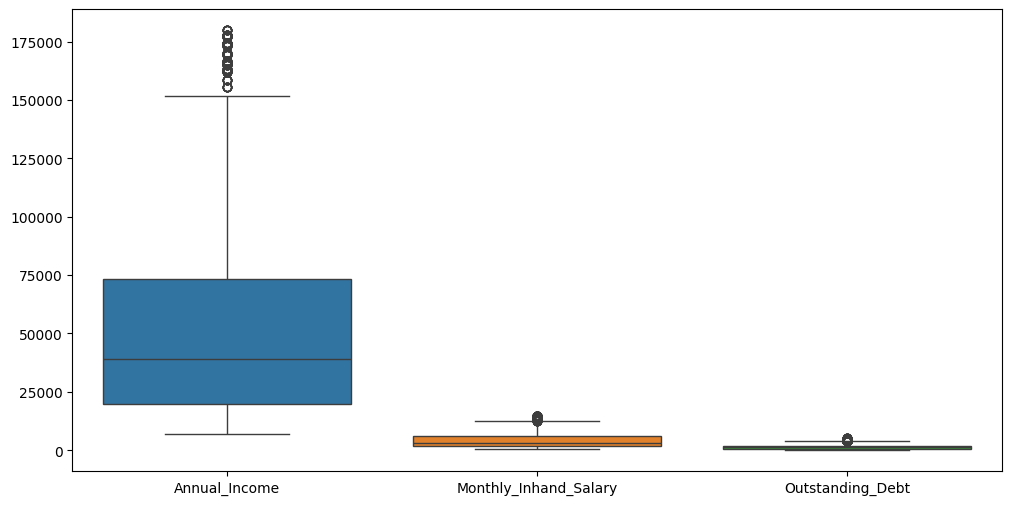

In [ ]:
# Visualize potential outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']])
plt.show()

# Handling outliers can involve capping, flooring, or removing them
# Example: Capping outliers at the 99th percentile
cap = df['Annual_Income'].quantile(0.99)
df.loc[df['Annual_Income'] > cap, 'Annual_Income'] = cap

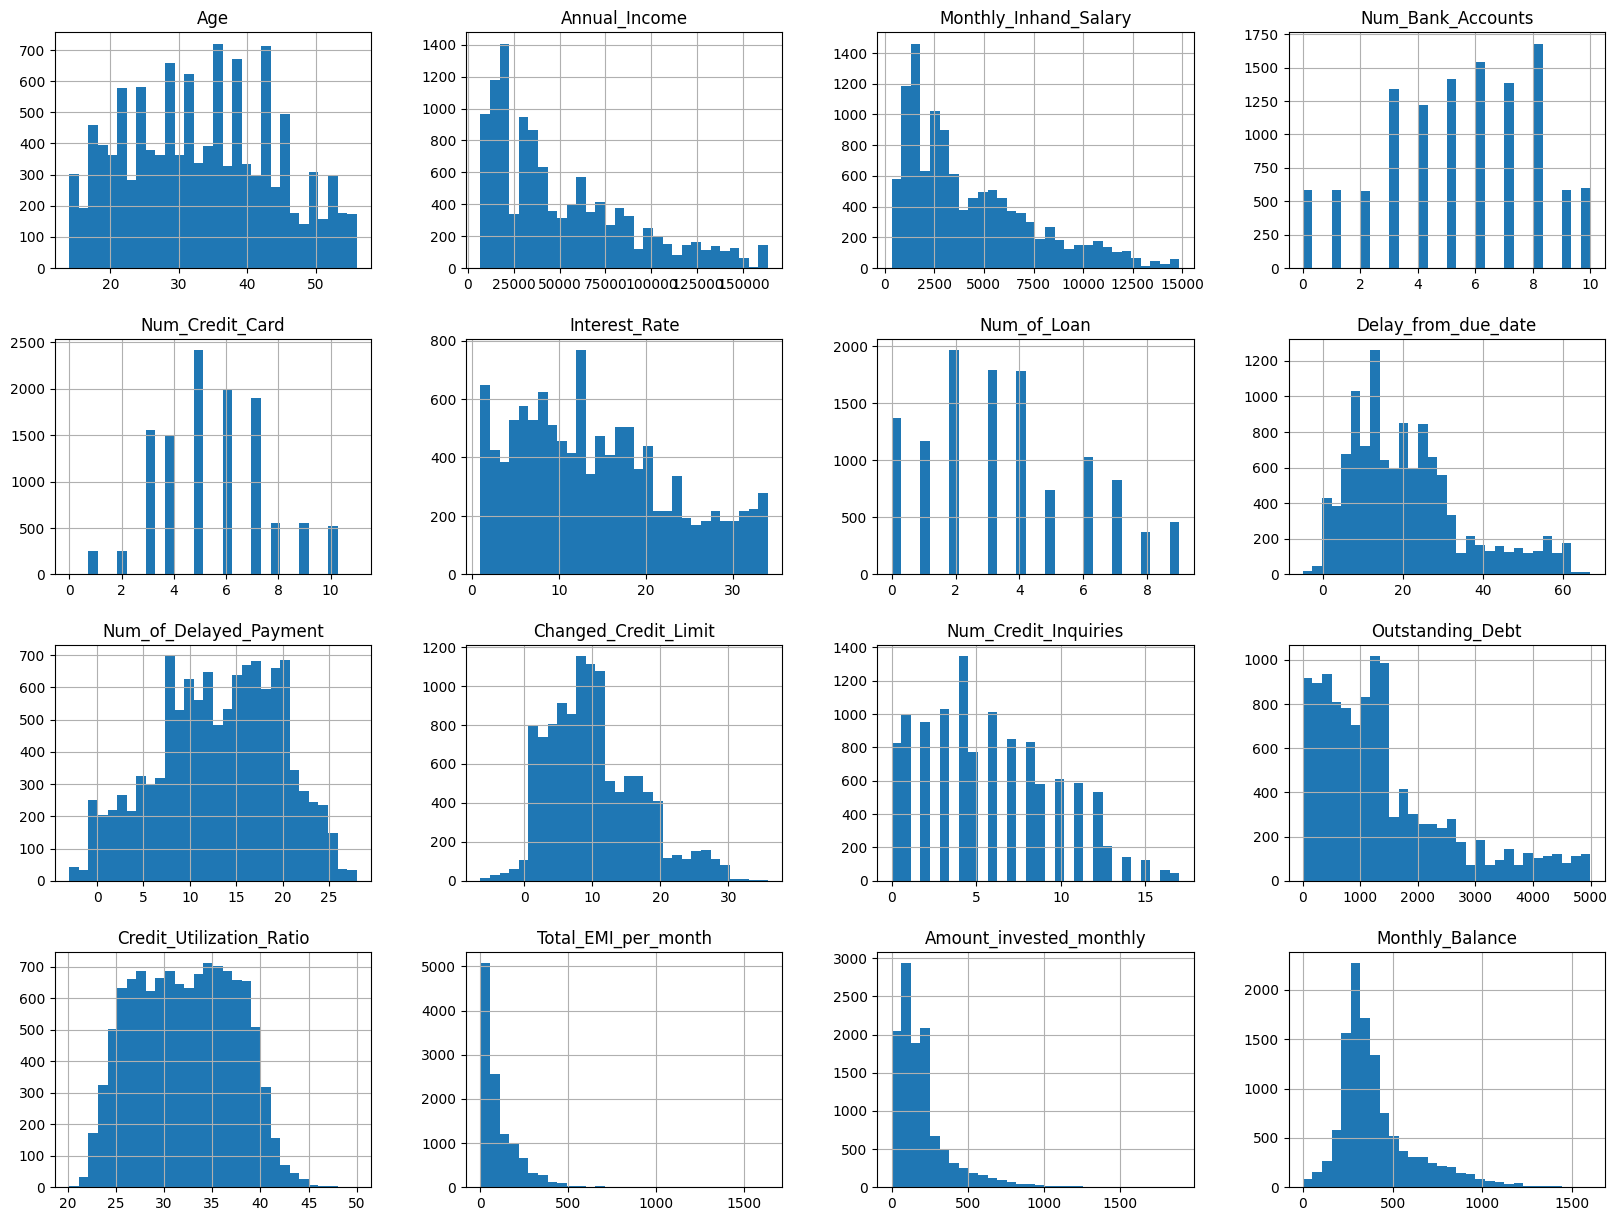

In [ ]:
# Histograms for continuous variables
df.hist(bins=30, figsize=(20, 15))
plt.show()

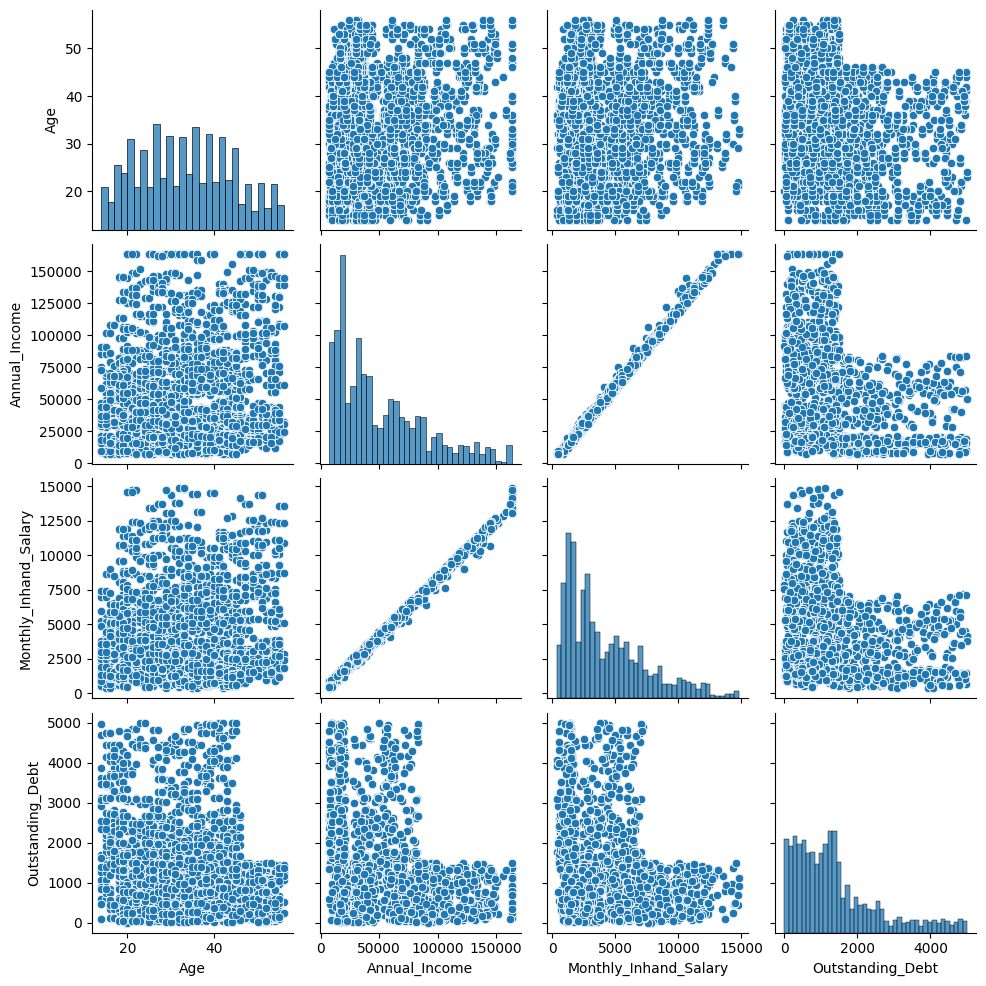

In [ ]:
# Scatter plots to explore relationships between variables
sns.pairplot(df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']])
plt.show()


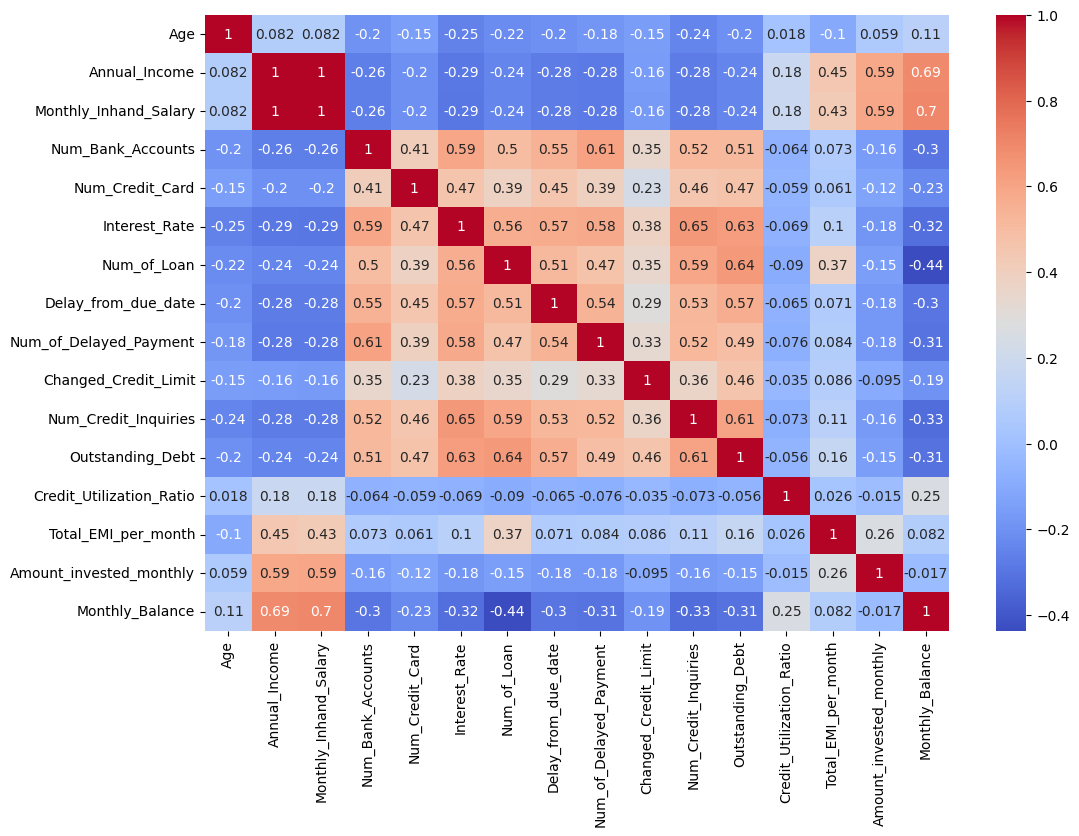

In [ ]:
# Correlation matrix and heatmap
# Select the columns of interest
selected_columns = df[['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance' ]]
corr_matrix =  selected_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

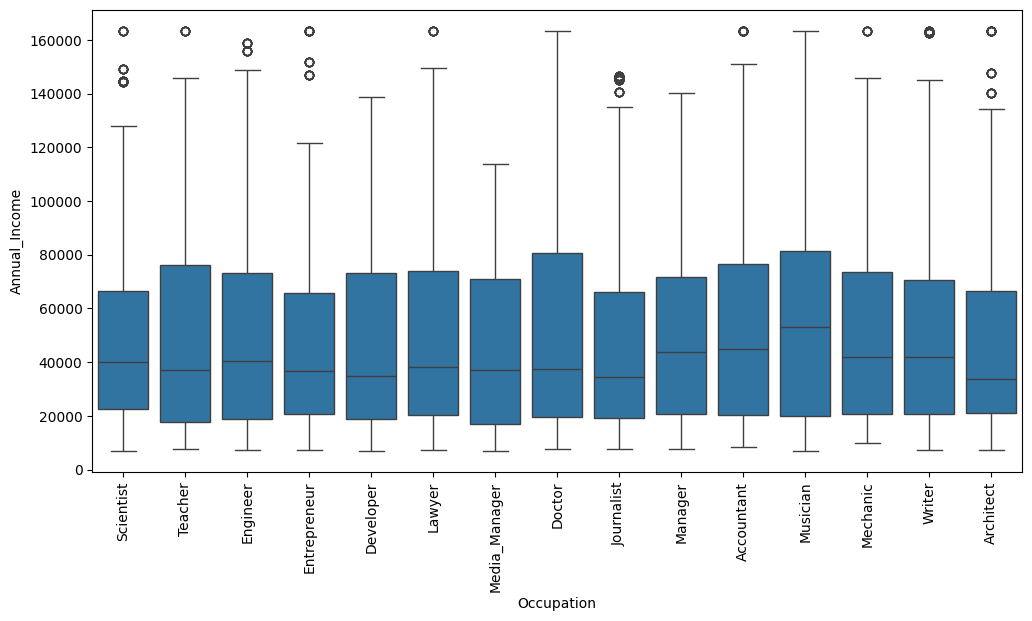

In [ ]:
# Box plots for categorical variables against continuous variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=df)
plt.xticks(rotation=90)
plt.show()

#Identify Relationships and Patterns

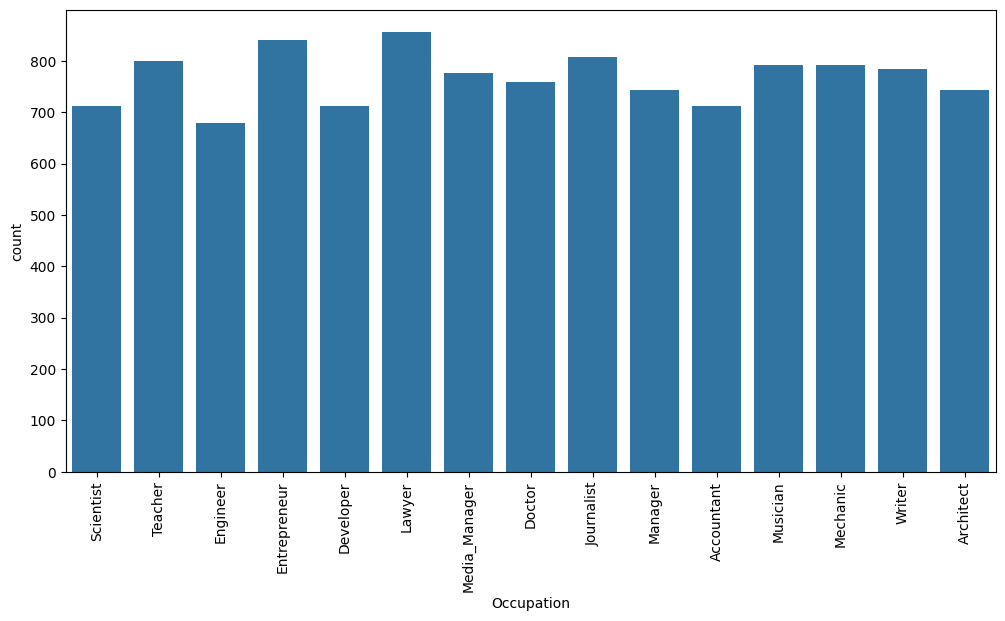

In [ ]:
# Count plots for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation')
plt.xticks(rotation=90)
plt.show()


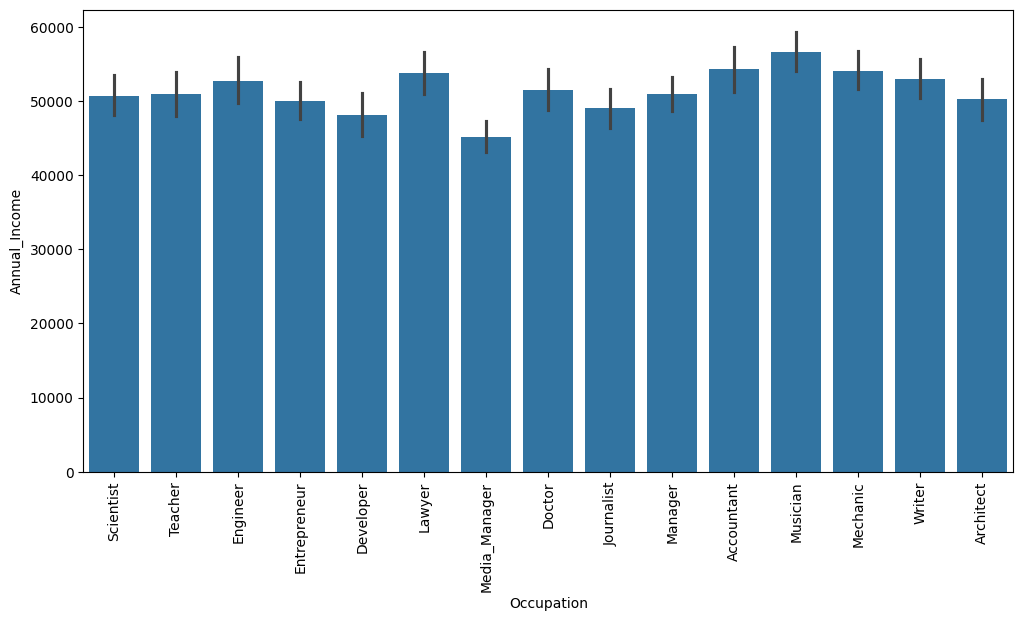

In [ ]:
# Bar plots to show mean values of a variable grouped by another variable
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Annual_Income', data=df)
plt.xticks(rotation=90)
plt.show()

#Feature Engineering - Creating new features that can be leveraged for the calculation of credit scores

In [ ]:
# Feature engineering (example: creating a new feature for debt-to-income ratio)
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

1. Payment History

Late Payments Count: Count the number of times payments were delayed

In [ ]:
df['Late_Payments_Count'] = df['Num_of_Delayed_Payment'].apply(lambda x: int(x) if x not in ['NA', ''] and int(x) > 0 else 0)

In [ ]:
df['Late_Payment_Indicator'] = df['Late_Payments_Count'].apply(lambda x: 1 if x > 0 else 0)


2. Credit Inquiries

In [ ]:
df['Total_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('sum')
df[['Customer_ID','Total_Credit_Inquiries']].head(20)

,Customer_ID,Total_Credit_Inquiries
0,CUS_0xd40,32.0
1,CUS_0xd40,32.0
2,CUS_0xd40,32.0
3,CUS_0xd40,32.0
4,CUS_0xd40,32.0
5,CUS_0xd40,32.0
6,CUS_0xd40,32.0
7,CUS_0xd40,32.0
8,CUS_0x21b1,16.0
9,CUS_0x21b1,16.0


3. Credit History Length

In [ ]:
# Compute the length of the credit history.

import re

def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    # Use a regular expression to extract numbers before "Years" and "Months"
    match = re.match(r"(\d+)\s*Years?\s*and\s*(\d+)\s*Months?", age_str)
    if match:
        years, months = int(match.group(1)), int(match.group(2))
        return years * 12 + months
    return np.nan  # Return NaN if the string is not in the expected format

# Apply the function to the Credit_History_Age column
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_to_months)


In [ ]:
#Calculate Credit History Length: Use the Credit_History_Months to compute the length of credit history.
df['Credit_History_Length'] = df['Credit_History_Age_Months'].max() - df['Credit_History_Age_Months']
df['Credit_History_Length'].dtype


dtype('int64')

4. Payment Trends

Calculate Payment Behavior Trends: Determine if there’s a pattern in Payment_Behaviour

In [ ]:
df['Credit_Mix'].iloc[165:185]

,Credit_Mix
165,Standard
166,Standard
167,Standard
168,Bad
169,Bad
170,Bad
171,Bad
172,Bad
173,Bad
174,Bad


In [ ]:
df['Payment_trends'] = df['Credit_Mix'].apply(lambda x: 1 if x in ['Good','Standard'] else 0)


In [ ]:
df['Payment_trends'].iloc[165:185]

,Payment_trends
165,1
166,1
167,1
168,0
169,0
170,0
171,0
172,0
173,0
174,0


5. Normalization/Scaling :
Normalize or scale features to ensure that all features contribute equally to the analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']] = scaler.fit_transform(
    df[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
        'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]
)


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Debt_to_Income_Ratio', 'Late_Payments_Count', 'Late_Payment_Indicator',
       'Total_Credit_Inquiries', 'Credit_History_Age_Months',
       'Credit_History_Length', 'Payment_trends'],
      dtype='object')

# Hypothetical Credit Score Calculation:

1. Hypothetical Credit Score Calculation:

In [ ]:
# Selecting relevant features for the hypothetical credit score calculation
features = [
    'Num_of_Delayed_Payment',
    'Late_Payments_Count',
    'Credit_Utilization_Ratio',
    'Credit_History_Length',
    'Payment_trends',
    'Total_EMI_per_month',
    'Outstanding_Debt'
]

# Subsetting the data
df_selected = df[features]
df_selected.head()

,Num_of_Delayed_Payment,Late_Payments_Count,Credit_Utilization_Ratio,Credit_History_Length,Payment_trends,Total_EMI_per_month,Outstanding_Debt
0,7,7,-1.055422,139,1,-0.446889,-0.511357
1,4,4,-0.061125,138,1,-0.446889,-0.511357
2,7,7,-0.708599,137,1,-0.446889,-0.511357
3,4,4,-0.171204,136,1,-0.446889,-0.511357
4,4,4,-1.448547,135,1,-0.446889,-0.511357


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11513 entries, 0 to 11512
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_of_Delayed_Payment    11513 non-null  int64  
 1   Late_Payments_Count       11513 non-null  int64  
 2   Credit_Utilization_Ratio  11513 non-null  float64
 3   Credit_History_Length     11513 non-null  int64  
 4   Payment_trends            11513 non-null  int64  
 5   Total_EMI_per_month       11513 non-null  float64
 6   Outstanding_Debt          11513 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 629.7 KB


2. Assign weights to each feature

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Normalize the selected features to a range of 0 to 1
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)

# Add Customer_ID to the normalized dataframe for later aggregation
df_normalized['Customer_ID'] = df['Customer_ID']


# Assign weights to each feature
weights = {
    'Num_of_Delayed_Payment': 0.3,
    'Outstanding_Debt': 0.1,
    'Credit_Utilization_Ratio': 0.2,
    'Credit_History_Length': 0.1,
    'Payment_trends': 0.3
}

# Calculate the weighted sum for the credit score
df_normalized['Credit_Score'] = (
    df_normalized['Num_of_Delayed_Payment'] * weights['Num_of_Delayed_Payment'] +
    df_normalized['Outstanding_Debt'] * weights['Outstanding_Debt'] +
    df_normalized['Credit_Utilization_Ratio'] * weights['Credit_Utilization_Ratio'] +
    df_normalized['Credit_History_Length'] * weights['Credit_History_Length'] +
    df_normalized['Payment_trends'] * weights['Payment_trends']
)


df_normalized['Credit_Score'] = 300 + df_normalized['Credit_Score'] * 550

# Aggregate the credit scores by Customer_ID (if needed)
customer_credit_scores = df_normalized.groupby('Customer_ID')['Credit_Score'].mean().reset_index()

# Sort customers by credit score
customer_credit_scores = customer_credit_scores.sort_values(by='Credit_Score', ascending=False)

customer_credit_scores.head(30)



,Customer_ID,Credit_Score
981,CUS_0x92ef,706.934379
1424,CUS_0xed3,706.394991
377,CUS_0x437c,701.382163
666,CUS_0x6895,700.993796
160,CUS_0x28ec,696.796772
1109,CUS_0xa2f7,695.450993
516,CUS_0x55e4,690.963890
141,CUS_0x271e,690.445341
818,CUS_0x7c21,690.119654
986,CUS_0x93bb,688.509052


3. Assign Credit Score Labels

In [ ]:
# Define bins for categorizing credit scores
bins = [300, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Assign labels based on the credit score
df_normalized['Credit_Rating'] = pd.cut(df_normalized['Credit_Score'], bins=bins, labels=labels)
df_normalized.head(20)

,Num_of_Delayed_Payment,Late_Payments_Count,Credit_Utilization_Ratio,Credit_History_Length,Payment_trends,Total_EMI_per_month,Outstanding_Debt,Customer_ID,Credit_Score,Credit_Rating
0,0.322581,0.250000,0.222941,0.344913,1.0,0.030336,0.161810,CUS_0xd40,570.619122,Poor
1,0.225806,0.142857,0.394676,0.342432,1.0,0.030336,0.161810,CUS_0xd40,573.405719,Poor
2,0.322581,0.250000,0.282844,0.339950,1.0,0.030336,0.161810,CUS_0xd40,576.935507,Poor
3,0.225806,0.142857,0.375663,0.337469,1.0,0.030336,0.161810,CUS_0xd40,571.041350,Poor
4,0.225806,0.142857,0.155041,0.334988,1.0,0.030336,0.161810,CUS_0xd40,546.636418,Poor
5,0.225806,0.142857,0.237681,0.332506,1.0,0.030336,0.161810,CUS_0xd40,555.590355,Poor
6,0.354839,0.285714,0.079279,0.330025,1.0,0.030336,0.161810,CUS_0xd40,559.319981,Poor
7,0.290323,0.214286,0.126089,0.327543,1.0,0.030336,0.161810,CUS_0xd40,553.687433,Poor
8,0.225806,0.142857,0.143866,0.210918,1.0,0.011514,0.120792,CUS_0x21b1,536.327362,Poor
9,0.129032,0.035714,0.616149,0.208437,1.0,0.011514,0.120792,CUS_0x21b1,572.174293,Poor


4. Analyze and Visualize the Results

In [ ]:
# Display summary statistics of the credit scores
print(df_normalized['Credit_Score'].describe())

count    11513.000000
mean       592.787108
std         54.858675
min        347.489730
25%        554.703011
50%        597.202021
75%        633.437477
max        748.277889
Name: Credit_Score, dtype: float64


Plot the distribution of credit scores

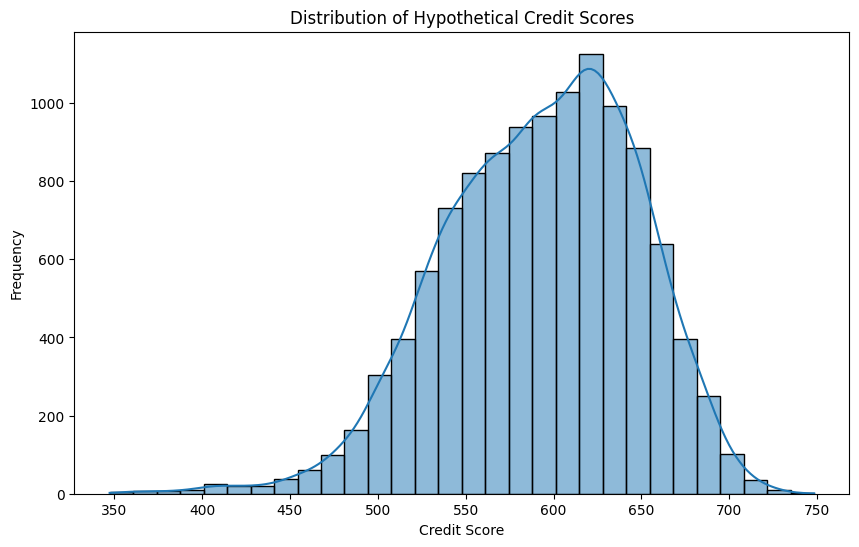

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_normalized['Credit_Score'], bins=30, kde=True)
plt.title('Distribution of Hypothetical Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

Count of each credit rating

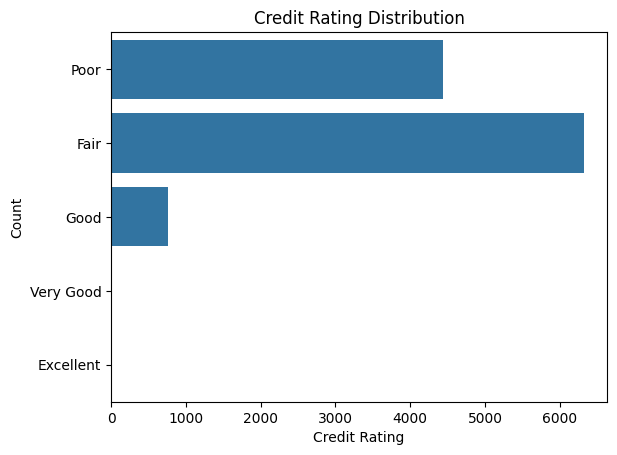

In [ ]:
sns.countplot(df_normalized['Credit_Rating'])
plt.title('Credit Rating Distribution')
plt.xlabel('Credit Rating')
plt.ylabel('Count')
plt.show()

# Insights and Recommendations

**# Key insights**

1. Distribution of Annual Income is right-skewed.
2. There is a positive correlation between Annual Income and Monthly Inhand Salary.
3. High number of delayed payments are associated with higher interest rates.
4. Occupation seems to have a significant impact on Annual Income.

5. Delayed Payments and Late Payments:
Customers with a higher number of delayed payments and late payments generally have lower credit scores. For example, a customer with Num_of_Delayed_Payment and Late_Payments_Count both being high tends to have a lower credit score.

6. Credit Utilization Ratio:
The credit utilization ratio seems to play a significant role in determining the credit score. Higher credit utilization ratios are often associated with lower credit scores.
7. Credit History Length:
Customers with longer credit histories tend to have better credit scores. For instance, a customer with a credit history length closer to 0.5 (normalized value) generally has a higher score.

8. Outstanding Debt:
The amount of outstanding debt also impacts the credit score. Customers with lower outstanding debt tend to have higher credit scores, which indicates better financial management.
9. Annual Income Outliers: There are several outliers above the upper whisker. These represent individuals with significantly higher annual incomes compared to the rest of the population.
10. The compact distribution of Outstanding_Debt suggests that debt levels are more consistent across individuals, possibly indicating that debt is managed similarly by most people in this dataset.

**Recommendations:**

1. Improve Payment Timeliness:

Customers should focus on making timely payments to reduce the number of delayed payments and late payments. This can significantly improve their credit scores.

2. Manage Credit Utilization:
Customers should aim to keep their credit utilization ratio low. A utilization ratio below 30% is generally recommended to maintain a good credit score.

3. Extend Credit History:
Customers with shorter credit histories should focus on maintaining open and active accounts over time. The length of credit history is a key factor in improving credit scores.

4. Reduce Outstanding Debt:
Customers should work on reducing their outstanding debt. Lower debt levels not only improve credit scores but also reflect better financial stability.

5. Personalized Financial Advice:
Offering personalized financial advice based on individual credit score components could help customers understand the specific areas they need to work on to improve their credit ratings.

6. Monitor Payment Behavior:
Regular monitoring and analysis of payment behavior trends can help identify customers at risk of falling into lower credit score categories, enabling early interventions.


By focusing on these recommendations, customers can work towards improving their credit scores, leading to better credit ratings and access to more favorable financial opportunities.









